In [1]:
#Assigning data points to DF

import astropy
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


hdulist = fits.open('allStar-dr17-synspec_rev1.fits')
hdu = hdulist[1]

In [2]:
SDSSID = hdu.header['TTYPE2']
SDSSIDdata = hdu.data[SDSSID]

FieldID = hdu.header['TTYPE8']
FieldIDdata = hdu.data[FieldID]

TESSID = hdu.header['TTYPE54']
TESSIDdata = hdu.data[TESSID]

GAIAID = hdu.header['TTYPE83']
GAIAIDdata = hdu.data[GAIAID]

ra = hdu.header['TTYPE10']
radata = hdu.data[ra]

d = hdu.header['TTYPE11']
ddata = hdu.data[d]

teff = hdu.header['TTYPE129']
teffdata = hdu.data[teff]

logg = hdu.header['TTYPE130']
loggdata = hdu.data[logg]

nvisits = hdu.header['TTYPE57']
nvisitsdata = hdu.data[nvisits]
#number of visits (doppler)

vscatter = hdu.header['TTYPE65']
vscatterdata = hdu.data[vscatter]
#scatter velocity

vsini = hdu.header['TTYPE139']
vsinidata = hdu.data[vsini]
#vsini values

SLs = hdu.header['TTYPE76']
SLsdata = hdu.data[SLs]
#number of spectral lines from doppler fit

carbon_abundance = hdu.header['TTYPE142']
nitrogen_abundance = hdu.header['TTYPE150']
cdata = hdu.data[carbon_abundance]
ndata = hdu.data[nitrogen_abundance]
#metallicity

S_N = hdu.header['TTYPE59']
#SNREV OR SNR (59 is SNREV, 58 SNR)
S_N_data = hdu.data[S_N]


teff_1 = teffdata.reshape(733901, 1)
logg_1 = loggdata.reshape(733901, 1)
nvisits_1 = nvisitsdata.reshape(733901, 1)
vscatter_1 = vscatterdata.reshape(733901, 1)
vsini_1 = vsinidata.reshape(733901,1)
SLs_1 = SLsdata.reshape(733901,1)
SDSSID_1 = SDSSIDdata.reshape(733901,1)
GAIAID_1 = GAIAIDdata.reshape(733901,1)
TESSID_1 = TESSIDdata.reshape(733901,1)
FieldID_1 = FieldIDdata.reshape(733901,1)
S_N_1 = S_N_data.reshape(733901,1)
ra_1 = radata.reshape(733901,1)
d_1 = ddata.reshape(733901,1)
c_1 = cdata.reshape(733901,1)
n_1 = ndata.reshape(733901,1)

teff_final = np.concatenate(teff_1)
logg_final = np.concatenate(logg_1)
nvisits_final = np.concatenate(nvisits_1)
vscatter_final = np.concatenate(vscatter_1)
vsini_final = np.concatenate(vsini_1)
SLs_final = np.concatenate(SLs_1)
SDSSID_final = np.concatenate(SDSSID_1)
GAIAID_final = np.concatenate(GAIAID_1)
TESSID_final = np.concatenate(TESSID_1)
FieldID_final = np.concatenate(FieldID_1)
S_N_final = np.concatenate(S_N_1)
ra_final = np.concatenate(ra_1)
d_final = np.concatenate(d_1)
c_final = np.concatenate(c_1)
n_final = np.concatenate(n_1)

df1 = pd.DataFrame({'field':FieldID_final,'sdss-id':SDSSID_final, 'gaia-id': GAIAID_final, 'targ-flags': TESSID_final,'right ascension':ra_final, 'declination': d_final, 'teff': teff_final, 
                    'logg': logg_final, 'nvisits': nvisits_final, 
                    'vscatter': vscatter_final, 'vsini': vsini_final, 'numSLs': SLs_final,'signal to noise':S_N_final, 'c_final': c_final, 'n_final': n_final})


#df2 = df1.query('nvisits>=2 & vscatter >= 1 & vsini > 10 & teff >3750 & teff <6000 & logg >3 & logg<4 & numSLs == 1')
df2 = df1.query('nvisits>=2 & numSLs == 1 & vscatter >=1 & vsini > 10')

C_N = df2.c_final - df2.n_final

df3 = pd.DataFrame({"C_N": C_N})
df3

df4 = pd.concat([df2, df3], axis=1, join="inner")

In [3]:
df2

,field,sdss-id,gaia-id,targ-flags,right ascension,declination,teff,logg,nvisits,vscatter,vsini,numSLs,signal to noise,c_final,n_final
23,120+12,2M00000662+7528598,539684085518533504,"APOGEE_NO_DERED,APOGEE_TELLURICAPOGEE2_NO_DERE...",0.027622,75.483292,6948.582520,66.630348,9,2.006593,37.033951,1,773.234985,NaN,NaN
52,116-04,2M00001687+5903034,423153204646998912,"APOGEE_NO_DERED,APOGEE_TELLURIC",0.070298,59.050957,7610.671387,121.507019,3,3.143908,55.577625,1,317.822357,NaN,NaN
68,116-04,2M00002039+5651114,421048705031502208,"APOGEE_NO_DERED,APOGEE_TELLURIC",0.084983,56.853188,7566.828125,104.403679,3,5.744100,92.875259,1,682.172058,NaN,NaN
72,NGC7789_btx,2M00002108+5527251,420511593602426240,"APOGEE2_NO_DERED,APOGEE2_TELLURIC",0.087843,55.456989,9188.475586,221.141388,7,3.561732,95.984261,1,756.510864,NaN,NaN
122,120+18,2M00003379+7940362,564638120384153472,"APOGEE2_TWOBIN_0_5_TO_0_8,APOGEE2_SFD_DERED,AP...",0.140803,79.676727,3368.393311,5.948203,4,1.093866,21.627188,1,140.945358,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733763,116+00,2M23592467+6220472,2012805293347453184,"APOGEE2_NO_DERED,APOGEE2_TELLURIC",359.852806,62.346458,8015.009277,221.141388,15,3.149565,40.644329,1,1228.057617,NaN,NaN
733764,117+01,2M23592467+6220472,2012805293347453184,"APOGEE_NO_DERED,APOGEE_TELLURIC",359.852806,62.346458,8004.395020,221.141388,4,4.288887,36.812897,1,531.734558,NaN,NaN
733770,NGC7789_btx,2M23592790+5740151,1998118742882029056,"APOGEE2_NO_DERED,APOGEE2_TELLURIC",359.866253,57.670864,7601.904785,138.070038,7,13.892696,83.541069,1,2202.223877,NaN,NaN
733848,SMC12,2M23594797-7254435,6380061394361042048,"APOGEE2_NO_DERED,APOGEE2_TELLURIC",359.949908,-72.912109,6503.821777,45.777061,12,12.275522,86.317734,1,896.137451,0.093200,0.95258


<IPython.core.display.Javascript object>


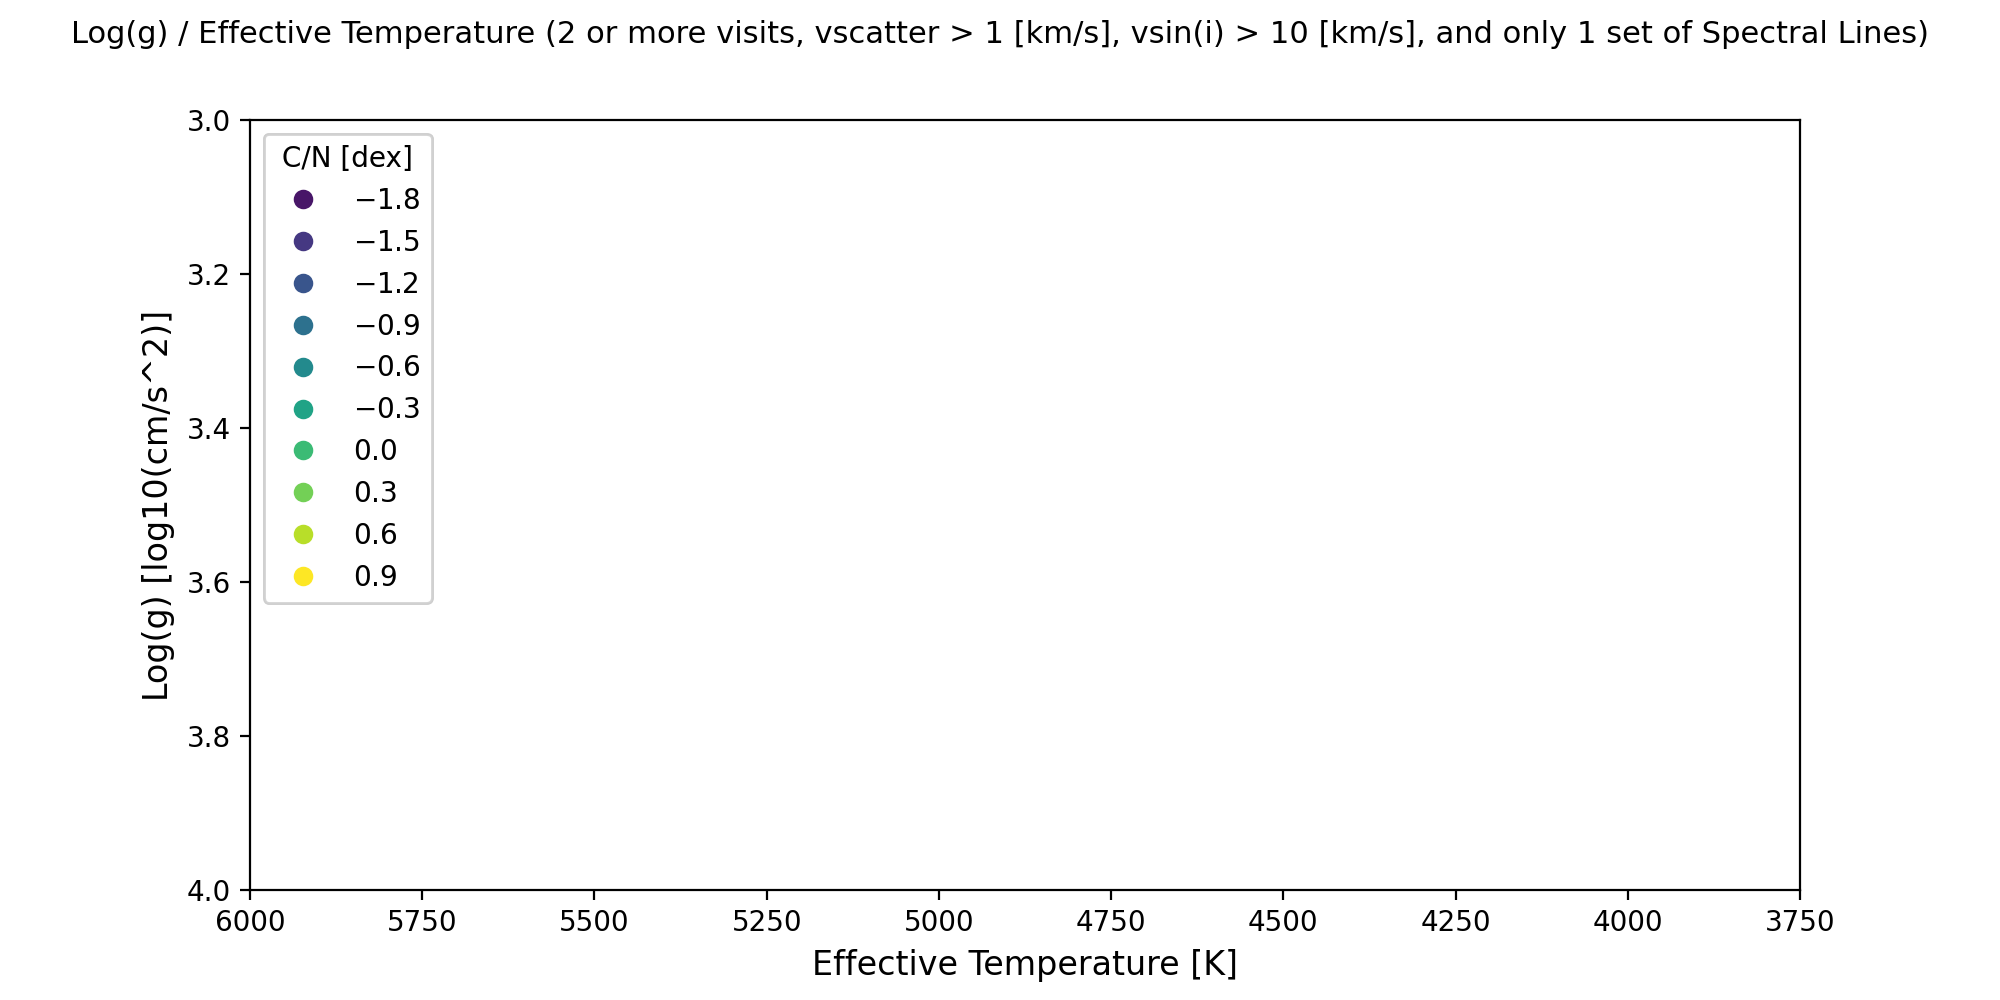

In [4]:
#Plotting

%matplotlib notebook

fig, ax = plt.subplots(figsize=(10, 5))
sizer = 10
scatter = ax.scatter(df4.teff, df4.logg, c= df4.C_N, label = 'Teff/Logg', s=sizer)
ax.set_xlim([6000,3750])
ax.set_ylim([4, 3])
fig.suptitle('Log(g) / Effective Temperature (2 or more visits, vscatter > 1 [km/s], vsin(i) > 10 [km/s], and only 1 set of Spectral Lines)', fontsize=11)
plt.xlabel('Effective Temperature [K]', fontsize=12)
plt.ylabel('Log(g) [log10(cm/s^2)]', fontsize=12)
legend = ax.legend(*scatter.legend_elements(),loc="upper left", title="C/N [dex]")
ax.add_artist(legend)
fig.show()

In [5]:
#Export to CSV

df4.to_csv(r'ShavedAPOGEEStars.csv')

In [6]:
df4.logg.size

16344

In [7]:
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5410 / length of dimension 1                          
NAXIS2  =               733901 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  234 / number of table fields                         
TTYPE1  = 'FILE    '                                                            
TFORM1  = '64A     '                                                            
TTYPE2  = 'APOGEE_ID'                                                           
TFORM2  = '30A     '                                                            
TTYPE3  = 'TARGET_ID'       

In [8]:
hdulist[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5410 / length of dimension 1                          
NAXIS2  =               733901 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  234 / number of table fields                         
TTYPE1  = 'FILE    '                                                            
TFORM1  = '64A     '                                                            
TTYPE2  = 'APOGEE_ID'                                                           
TFORM2  = '30A     '                                                            
TTYPE3  = 'TARGET_ID'       